# Titanic with Keras

Bu projede daha önce makine öğrenmesi yöntemiyle geliştirilen sınıflandırma modelinde kullanılan `Titanik` verileri ayrıca derin öğrenme modeli ile yeniden çalışılmaktadır.

In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)

In [3]:
# Classification ödevinde hazır hale getirilen veri seti kullanıldı
df=pd.read_csv("titanic.csv")

In [4]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Senior,Family,Single,Small,Medium,Large
0,0,0.0,3,male,22.0,1,0,7.2500,S,Mr,0,2,False,True,False,False
1,1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,0,2,False,True,False,False
2,2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1,True,False,False,False
3,3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,0,2,False,True,False,False
4,4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1,True,False,False,False


In [40]:
df.Survived.value_counts(dropna=False)

Survived
0.0    549
NaN    418
1.0    342
Name: count, dtype: int64

In [5]:
df_dummies=pd.get_dummies(df, drop_first=True)

In [6]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [7]:
df_train.shape, df_test.shape

((891, 19), (418, 19))

In [8]:
df_train.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,True,False,True,False,True,False
1,1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,False,False,False,False,False,True
2,2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,False,False,True,True,False,False
3,3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,False,False,True,False,False,True
4,4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,True,False,True,False,True,False


In [9]:
x=df_train.iloc[:,2:]
y=df_train.iloc[:,1:2]
x.shape, y.shape

((891, 17), (891, 1))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
x=scaler.fit_transform(x)

In [12]:
#pip install tensorflow

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
model = Sequential()
model.add(Dense(17, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

In [16]:
model.fit(x,y, epochs=150, batch_size=30, verbose=1)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6357 - loss: 0.6538
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7310 - loss: 0.5569 
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8083 - loss: 0.4708
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8300 - loss: 0.4353
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.4391 
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8377 - loss: 0.4048 
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.3952
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4347
Epoch 9/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8371 - loss: 0.4099 
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.4257
Epoch 11/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8498 - loss: 0.3848
Epoch 12/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,173 (35.84 KB)

 Trainable params: 3,057 (11.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,116 (23.89 KB)

In [18]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8447 - loss: 0.3504  
compile_metrics: 85.41%


In [19]:
model = Sequential()
model.add(Dense(17, activation='relu'))
model.add(Dense(340, activation='relu'))
model.add(Dense(170, activation='relu'))
model.add(Dense(340, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

In [21]:
history = model.fit(x,y, epochs=500, batch_size=30, verbose=1)

Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6836 - loss: 0.5961
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4523
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8379 - loss: 0.4037
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3691
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.4056
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.4092
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3834
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.4029
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.4071
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8417 - loss: 0.3842
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 0.3846
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 340)                 │           6,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 170)                 │          57,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 340)                 │          58,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,633 (1.41 MB)

 Trainable params: 122,877 (479.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,756 (959.99 KB)

In [23]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9079 - loss: 0.2186  
compile_metrics: 91.69%


In [24]:
import matplotlib.pyplot as plt

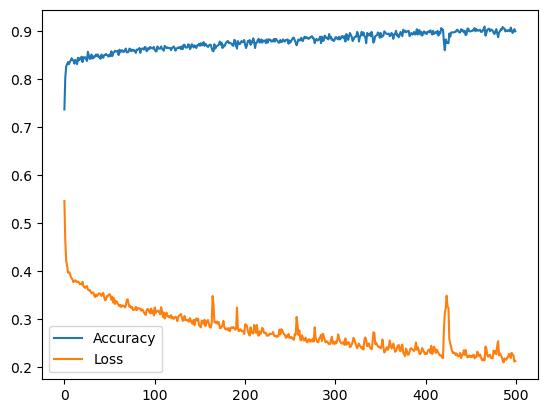

In [25]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["loss"], label="Loss")
plt.legend()

In [30]:
x.shape, df_test.shape

((891, 17), (418, 19))

In [31]:
df_test.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
891,0,NaN,3,34.5,0,0,7.8292,0,1,True,False,False,False,True,True,False,False,True,False
892,1,NaN,3,47.0,1,0,7.0000,0,2,False,True,False,False,False,False,True,False,False,True
893,2,NaN,2,62.0,0,0,9.6875,0,1,True,False,False,False,True,True,False,False,True,False
894,3,NaN,3,27.0,0,0,8.6625,0,1,True,False,False,False,True,False,True,False,True,False
895,4,NaN,3,22.0,1,1,12.2875,0,3,False,True,False,False,False,False,True,False,False,True


In [41]:
xt=df_test.iloc[:,2:]

In [42]:
xt=scaler.fit_transform(xt)

In [43]:
tahmin=model.predict(xt)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [44]:
tahmin

array([[5.35771833e-04],
       [9.84781655e-04],
       [2.52566446e-04],
       [1.25343397e-01],
       [9.50360578e-03],
       [1.52750537e-01],
       [5.37825865e-04],
       [1.19861965e-04],
       [1.00000000e+00],
       [1.51863964e-02],
       [1.34920210e-01],
       [8.17647457e-01],
       [1.00000000e+00],
       [6.01629649e-11],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.86688097e-02],
       [5.06832123e-01],
       [8.24383460e-04],
       [1.00000000e+00],
       [9.99893785e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99967992e-01],
       [1.00000000e+00],
       [4.45712935e-19],
       [1.00000000e+00],
       [4.06836748e-01],
       [3.48588824e-01],
       [5.63026070e-10],
       [5.42427492e-10],
       [7.09805489e-02],
       [9.95078444e-01],
       [9.89739776e-01],
       [3.63327831e-01],
       [4.65431005e-01],
       [5.02852619e-01],
       [4.92459327e-01],
       [1.18071318e-01],
       [7.80626297e-01],


In [48]:
import numpy as np
np.round(tahmin,2)

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.13],
       [0.01],
       [0.15],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.02],
       [0.13],
       [0.82],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.03],
       [0.51],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.41],
       [0.35],
       [0.  ],
       [0.  ],
       [0.07],
       [1.  ],
       [0.99],
       [0.36],
       [0.47],
       [0.5 ],
       [0.49],
       [0.12],
       [0.78],
       [0.  ],
       [0.64],
       [0.16],
       [1.  ],
       [1.  ],
       [0.12],
       [0.31],
       [0.04],
       [1.  ],
       [0.02],
       [0.76],
       [0.5 ],
       [1.  ],
       [1.  ],
       [0.41],
       [0.  ],
       [0.1 ],
       [0.12],
       [0.  ],
       [1.  ],
       [0.11],
       [0.17],
       [0.09],
       [0.81],
       [1.  ],
       [1.  ],
       [0.

In [46]:
df_test["Survived"]=np.round(tahmin)

C:\Users\Abdullatif\AppData\Local\Temp\ipykernel_8080\2535138676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Survived"]=np.round(tahmin)


In [47]:
df_test.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
891,0,0.0,3,34.5,0,0,7.8292,0,1,True,False,False,False,True,True,False,False,True,False
892,1,0.0,3,47.0,1,0,7.0000,0,2,False,True,False,False,False,False,True,False,False,True
893,2,0.0,2,62.0,0,0,9.6875,0,1,True,False,False,False,True,True,False,False,True,False
894,3,0.0,3,27.0,0,0,8.6625,0,1,True,False,False,False,True,False,True,False,True,False
895,4,0.0,3,22.0,1,1,12.2875,0,3,False,True,False,False,False,False,True,False,False,True


In [50]:
df_test["PassengerId"]=df_test.index

C:\Users\Abdullatif\AppData\Local\Temp\ipykernel_8080\942135220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["PassengerId"]=df_test.index


In [54]:
df_test["Survived"]=df_test["Survived"].astype(int)

C:\Users\Abdullatif\AppData\Local\Temp\ipykernel_8080\3950454021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Survived"]=df_test["Survived"].astype(int)


In [59]:
df_test.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,PassengerId
891,0,0,3,34.5,0,0,7.8292,0,1,True,False,False,False,True,True,False,False,True,False,892
892,1,0,3,47.0,1,0,7.0000,0,2,False,True,False,False,False,False,True,False,False,True,893
893,2,0,2,62.0,0,0,9.6875,0,1,True,False,False,False,True,True,False,False,True,False,894
894,3,0,3,27.0,0,0,8.6625,0,1,True,False,False,False,True,False,True,False,True,False,895
895,4,0,3,22.0,1,1,12.2875,0,3,False,True,False,False,False,False,True,False,False,True,896


In [58]:
df_test["PassengerId"]=df_test["PassengerId"]+1

C:\Users\Abdullatif\AppData\Local\Temp\ipykernel_8080\924310891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["PassengerId"]=df_test["PassengerId"]+1


In [60]:
df_test[["PassengerId", "Survived"]].to_csv("titanic_deep.csv", index=False)

## Sonuç


Bu projede daha önce makine öğrenmesi yöntemiyle geliştirilen sınıflandırma modelinde kullanılan `Titanik` verileri ayrıca derin öğrenme modeli ile yeniden çalışılmıştır.